In [11]:
from py4j.java_gateway import JavaGateway
import speed_db as speed
from importlib import reload
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
from scipy import stats as st

In [18]:
gateway = JavaGateway() 

In [19]:
gateway.pushGraph("fortaleza","/Users/liviaalmada/git/traveltime/travel-time/resources/fortaleza-graphast")

In [20]:
gateway.addGaussianCosts("fortaleza","/Users/liviaalmada/git/traveltime/travel-time/resources/graphast-to-graphhopper-map",4)

In [21]:
graph = gateway.getGraph("fortaleza")

In [22]:
cost = graph.getProbabilisticCosts(1,1)

In [23]:
cost.toString()

'14.457722479257757;0.2759342488989945'

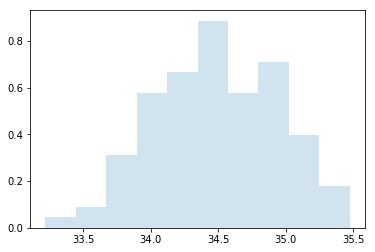

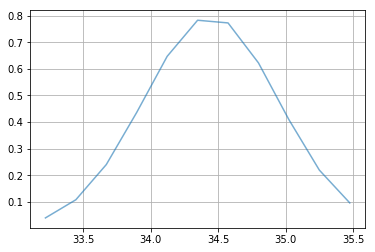

In [24]:
reload(speed)
cost0 = graph.getProbabilisticCosts(647,0)
x0 = cost0.getParameters() 
r = norm.rvs(size=100, loc=x0[0], scale=0.5) #loc é a média, scale é o desvio padrão
count, bins, ignored = plt.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
plt.show()
plt.grid()
plt.xticks()
speed.plot_pdf2(x0[0],0.5, bins)

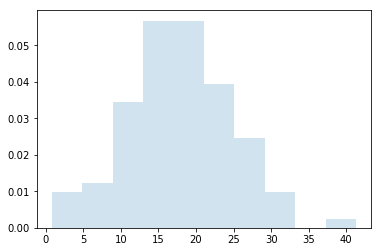

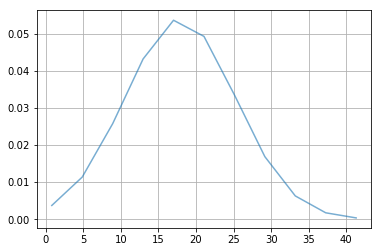

In [25]:
cost1 = graph.getProbabilisticCosts(647,1)
x1 = cost1.getParameters() 
r = norm.rvs(size=100, loc=x1[0], scale=x1[1]) #loc é a média, scale é o desvio padrão
count, bins, ignored = plt.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
plt.show()
plt.grid()
plt.xticks()
speed.plot_pdf2(x1[0],x1[1], bins)

In [26]:
st.kstest(norm.rvs(size=1000, loc=x0[0], scale=x1[1]),"norm", args=(x0[0],x1[1]))

KstestResult(statistic=0.018548668241147703, pvalue=0.88156218137032172)

In [27]:
st.kstest(norm.rvs(size=100, loc=16, scale=1.7),"norm", args=(28,0.5))

KstestResult(statistic=1.0, pvalue=0.0)

In [28]:
st.kstest(norm.rvs(size=100, loc=30.4, scale=2.4),"norm", args=(28.36,11.65))

KstestResult(statistic=0.41863256969351109, pvalue=2.2204460492503131e-16)

In [29]:
st.kstest(norm.rvs(size=100, loc=7.45, scale=9.47),"norm", args=(28.36,11.65))

KstestResult(statistic=0.765489419073758, pvalue=0.0)

In [30]:
st.kstest(norm.rvs(size=1000, loc=19.3, scale=8.6),"norm", args=(7.45,9.47))

KstestResult(statistic=0.49596450565762001, pvalue=0.0)

In [31]:
st.kstest(norm.rvs(size=1000, loc=12.3, scale=4.1),"norm", args=(19.3,8.6))

KstestResult(statistic=0.4812277146324983, pvalue=0.0)

In [32]:
gateway.runLinkScanWithKolnogorovSmirnovDistance("fortaleza","cluster-teste", 0.2,10,30,3)